#**Data Exploration of "University Advancement, Donations, and Giving"**

### By: Robbi Horvath
### January 2022

"University Advancement, Donations, and Giving" from Tableau Public Sample Data https://public.tableau.com/app/resources/sample-data

##**Introduction**
The goal of this notebook is to perform data exploration and simple regression models using fictional university charitible giving data. 

##**Columns**
###**Prospect ID** - Individual donors
### **Year of Graduation** - Year that the donor graduated from University
### **Allocation Subcategory** - Various funds, colleges, libraries, endowments, etc. This is a more granualar category of Gift Allocation (see below)
### **City** - City of residence of donor
### **College** - This is a high level of academic specialization such as College of Natural Science, College of Business, College of Nurse, etc
### **Gift Allocation** - Categories of intended gifts including endowment, campus resource, or endowment
### **Gift Amount** - Amount in $ of individual gift
### **Gift Date** - Date gift was made
### **Major** - Specialized area of study within college (ex. Marketing or Finance within the College of Business)
### **State** - State of residence of donor in two letter abbreviated format





In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving GradYear.csv to GradYear (7).csv
Saving GiftRecords.csv to GiftRecords (7).csv


In [ ]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from scipy import stats
import warnings
import io
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Import both sheets as csv files 

df1 = pd.read_csv(io.BytesIO(uploaded['GradYear.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['GiftRecords.csv']))
df1.head()


,Prospect ID,Year of Graduation
0,1515,1970
1,1588,1992
2,2508,1984
3,2589,1981
4,3012,1993


In [ ]:
df2.head()

,Allocation Subcategory,City,College,Gift Allocation,Gift Amount,Gift Date,Major,Prospect ID,State
0,College of Natural Science,Denver,College of Natural Science,Scholarship,5088.0,7/28/2010,Biological Science Interdepartmental,1000,CO
1,College of Natural Science,San Francisco,College of Social Science,Scholarship,3793.0,9/10/2010,Human Development and Family Studies,1001,CA
2,Minority Scholarship Fund,Los Angeles,College of Business,Scholarship,2952.0,6/30/2010,Accounting,1002,CA
3,College of Communication Arts and Sciences,Mesa,College of Natural Science,Scholarship,2872.0,11/23/2010,Mathematics,1003,AZ
4,Diversity Fund,West Valley City,College of Social Science,Endowment,2022.0,10/10/2010,Psychology,1004,UT


In [ ]:
#Join the CSV files on the Prospect ID column

result = pd.merge(df1, df2, on='Prospect ID')
result.head()

,Prospect ID,Year of Graduation,Allocation Subcategory,City,College,Gift Allocation,Gift Amount,Gift Date,Major,State
0,1515,1970,College of Nursing,Cedar Rapids,College of Arts and Sciences,Scholarship,4461.0,6/19/2015,Arts & Letters-General,IA
1,1515,1970,College of Social Science,Cedar Rapids,College of Arts and Sciences,Scholarship,4461.0,8/12/2015,Arts & Letters-General,IA
2,1588,1992,Trustees Fund,Denver,College of Arts and Sciences,Endowment,13408.5,10/9/2011,Chinese,CO
3,1588,1992,Faculty Chair Endowments,Denver,College of Arts and Sciences,Endowment,13408.5,7/5/2015,Chinese,CO
4,2508,1984,University Libraries,Salem,College of Music,Campus Resource,5309.0,3/24/2011,Jazz Studies,OR


In [ ]:
result.shape

(3913, 10)

In [ ]:
#There are 3913 rows and 10 columns

In [ ]:
result.describe()

,Prospect ID,Year of Graduation,Gift Amount
count,3913.000000,3913.000000,3913.000000
mean,2044.888065,1987.814976,6305.330181
std,622.801170,8.843418,9234.829982
min,1000.000000,1960.000000,8.000000
25%,1496.000000,1983.000000,2775.000000
50%,1957.000000,1989.000000,5718.000000
75%,2560.000000,1994.000000,8519.000000
max,3319.000000,2009.000000,455821.000000


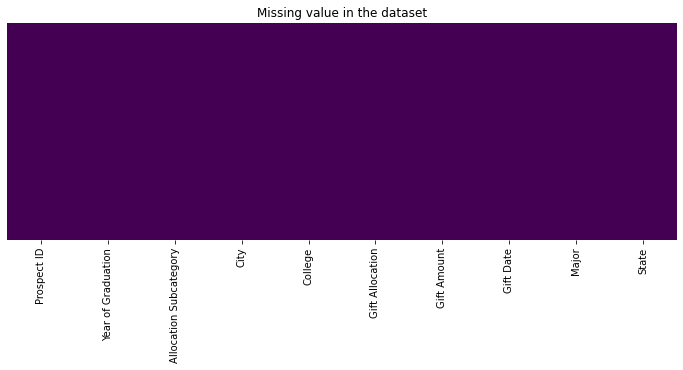

In [ ]:
#checking for missing values
plt.figure(figsize=(12,4))
sns.heatmap(result.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [ ]:
# Need to one hot encode the rest of the categorical columns
# One-hot encode the specified columns
result = pd.get_dummies(result, columns=['Allocation Subcategory','City','College','Gift Allocation','Major','State'])

In [ ]:
result.describe()

,Prospect ID,Year of Graduation,Gift Amount,Allocation Subcategory_Alumni Association,Allocation Subcategory_Athletics,Allocation Subcategory_Campus Museums,Allocation Subcategory_Campus Recreation,Allocation Subcategory_College of Agriculture and Natural Resources,Allocation Subcategory_College of Arts and Sciences,Allocation Subcategory_College of Business,...,State_PA,State_RI,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WY
count,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,...,3913.000000,3913.00000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000
mean,2044.888065,1987.814976,6305.330181,0.029389,0.029645,0.028623,0.028111,0.054689,0.074879,0.016356,...,0.014056,0.00690,0.013800,0.027856,0.079990,0.014311,0.030411,0.026834,0.008945,0.001278
std,622.801170,8.843418,9234.829982,0.168916,0.169627,0.166764,0.165312,0.227402,0.263229,0.126856,...,0.117736,0.08279,0.116676,0.164581,0.271312,0.118786,0.171739,0.161618,0.094164,0.035728
min,1000.000000,1960.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1496.000000,1983.000000,2775.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1957.000000,1989.000000,5718.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2560.000000,1994.000000,8519.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3319.000000,2009.000000,455821.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


298 columns is hard to read so I will check for missing values another way

I need to look at the distribution of my dependant variable Gift Amount

In [ ]:
#descriptive statistics summary of Gift Amount
train['Gift Amount'].describe()

count    3130.000000
mean      399.191384
std       148.017082
min         1.924666
25%       305.347866
50%       422.746035
75%       499.525060
max      1940.150186
Name: Gift Amount, dtype: float64

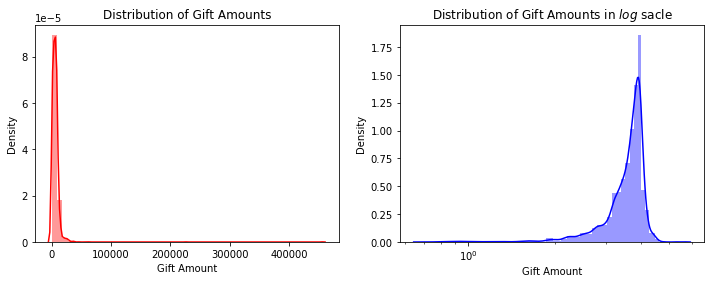

In [ ]:
# I need to visualize Gift Amount
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(result['Gift Amount'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Gift Amounts')

ax=f.add_subplot(122)
sns.distplot(np.log10(result['Gift Amount']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of Gift Amounts in $log$ sacle')
ax.set_xscale('log');

The left plot has a really long positive skew but the log scale is also skewed negatively. I need to see if I can transform the data.

In [ ]:
# Need to transform data. I also tried a few other variations.

import numpy as np
from scipy.stats import boxcox

# Extract the column you want to transform
train_column = result['Gift Amount']

# Apply the transformation
train_column, _ = boxcox(np.sqrt(np.log(train_column)))

# Assign the transformed column back to the dataframe
result['Gift Amount'] = train_column

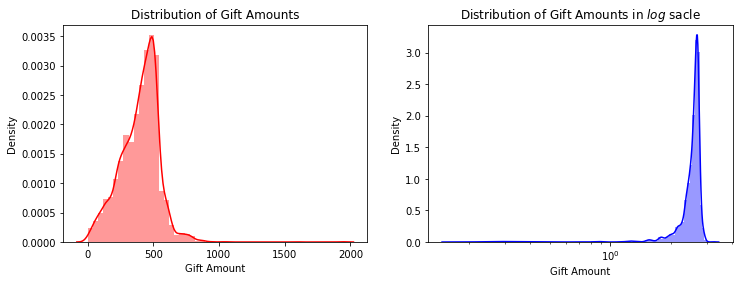

In [ ]:
# I need to visualize the transformed Gift Amount now
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(result['Gift Amount'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Gift Amounts')

ax=f.add_subplot(122)
sns.distplot(np.log10(result['Gift Amount']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of Gift Amounts in $log$ sacle')
ax.set_xscale('log');

The left distribution looks much better

In [ ]:
#Split the dataset into training and test for analysis
#Train is 80% and Test is set to 20%
#Set random_state helps with reproducibility by keeping the same split every time the code is run

from sklearn.model_selection import train_test_split

train, test = train_test_split(result, test_size=0.2, random_state=42)

In [ ]:
train.shape


(3130, 299)

In [ ]:
test.shape

(783, 299)

In [ ]:
train.head()

,Prospect ID,Year of Graduation,Gift Amount,Gift Date,Allocation Subcategory_Alumni Association,Allocation Subcategory_Athletics,Allocation Subcategory_Campus Museums,Allocation Subcategory_Campus Recreation,Allocation Subcategory_College of Agriculture and Natural Resources,Allocation Subcategory_College of Arts and Sciences,...,State_PA,State_RI,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WY
3209,1604,2000,469.233808,6/26/2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2359,2569,1973,768.596298,5/3/2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3762,2538,1989,805.293877,5/29/2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2132,2616,1990,490.653501,9/28/2012,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2392,2843,1962,365.457175,2/26/2014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Distribution looks pretty good.

In [ ]:
#descriptive statistics summary of Gift Amount
train['Gift Amount'].describe()

count    3130.000000
mean      399.191384
std       148.017082
min         1.924666
25%       305.347866
50%       422.746035
75%       499.525060
max      1940.150186
Name: Gift Amount, dtype: float64

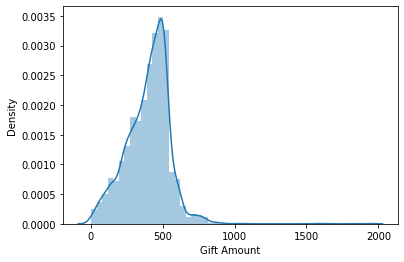

In [ ]:
#histogram of Gift Amount
sns.distplot(train['Gift Amount']);

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % train['Gift Amount'].skew())
print("Kurtosis: %f" % train['Gift Amount'].kurt())

Skewness: 0.237070
Kurtosis: 5.037647


Distribution looks pretty good.

# Prepping to fit model

First, I need to separate out Gift Amount as the dependant variable (train_y and test_y) and all the other columns as train_x and test_x

In [ ]:
#Use Gift Amount as dependant variable (y)
train_y = train['Gift Amount']
train_x = train.drop(['Gift Amount'],axis=1)
test_y = test['Gift Amount']
test_x = test.drop(['Gift Amount'], axis=1)

# Reset the indices of the dataframes
train_x = train_x.reset_index(drop=True)
train_y = train_y.reset_index(drop=True)
test_x = test_x.reset_index(drop=True)
test_y = test_y.reset_index(drop=True)

In [ ]:
# Convert the "Gift Date" column to datetime format from string for both train and test sets
train_x['Gift Date'] = pd.to_datetime(train_x['Gift Date'])
test_x['Gift Date'] = pd.to_datetime(test_x['Gift Date'])

# Remove rows with missing values from both dataframes
train_x.dropna(subset=['Gift Date'], inplace=True)
test_x.dropna(subset=['Gift Date'], inplace=True)

# Extract the timestamp from the datetime values and store it as a float for both train and test sets
train_x['Gift Date'] = train_x['Gift Date'].apply(lambda x: x.timestamp())
test_x['Gift Date'] = test_x['Gift Date'].apply(lambda x: x.timestamp())

In [ ]:
# normalize the data using standard deviation and mean to help regressors run more smoothly
m = train_x.mean()
std = train_x.std()

train_x = (train_x - m) / std
test_x = (test_x - m) / std

In [ ]:
# make sure both sets are compatible for regression
print(train_x.shape)
print(train_y.shape)

(3130, 298)
(3130,)


# Linear Regression Models

### **A. Linear Regression without regularization**

In [ ]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(train_x, train_y)

LinearRegression()

In [ ]:
# top influencers

maxcoef = np.argsort(-np.abs(model.coef_))
coef = model.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(result.columns[maxcoef[i]], coef[i]))

State_KY.................  6.0826e+15
City_New Haven........... -4.8002e+15
City_Austin.............. -4.5783e+15
Major_Zoology............  4.0329e+15
City_Billings............ -3.4291e+15


This looks interesting but it's probably overfitted because of the dummy features. Considering the data is fictional, the city and state results could be due to chance?

### **B Linear Regression with L1 regularization**

In [ ]:
# Create linear regression object
Ls = LassoCV()

# Train the model using the training sets
Ls.fit(train_x, train_y)

LassoCV()

In [ ]:
# top influencers

maxcoef = np.argsort(-np.abs(Ls.coef_))
coef = Ls.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(result.columns[maxcoef[i]], coef[i]))

Prospect ID..............  1.5382e+01
City_Dallas..............  1.4831e+01
City_Tulsa............... -1.4554e+00
City_Philadelphia........ -8.7654e-01
Major_Biological Science Interdepartmental -6.7462e-01


This makes more sense because someone who already donated seems more likely to donate again (Prospect ID)

I need to look at the cities and major more closely

### **C Linear Regression with L2 regularization**



In [ ]:
# Create linear regression object
Rr = RidgeCV()

# Train the model using the training sets
Rr.fit(train_x, train_y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [ ]:
maxcoef = np.argsort(-np.abs(Rr.coef_))
coef = Rr.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(result.columns[maxcoef[i]], coef[i]))

Prospect ID..............  2.3056e+01
City_Dallas..............  1.2560e+01
State_CA.................  9.2716e+00
Major_Electrical Engineering  7.2601e+00
Major_Biological Science Interdepartmental -6.6010e+00


This seems even more closely aligned to my data exploration in Tableau: prior donors, donors in Texas (Dallas), California, Science majors

###**D. Linear Regression elastic net**

This includes both Lasso and Ridge regularization together.

In [ ]:
# Create linear regression object
EN = ElasticNetCV(l1_ratio=np.linspace(0.1, 1.0, 5)) # we are essentially smashing most of the Rr model here

# Train the model using the training sets
train_EN = EN.fit(train_x, train_y)

In [ ]:
# top influencers

maxcoef = np.argsort(-np.abs(EN.coef_))
coef = EN.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(result.columns[maxcoef[i]], coef[i]))

Prospect ID..............  1.5382e+01
City_Dallas..............  1.4831e+01
City_Tulsa............... -1.4554e+00
City_Philadelphia........ -8.7654e-01
Major_Biological Science Interdepartmental -6.7462e-01


Very similar to C

Comparisons of models

In [ ]:
model = [Ls, Rr, EN]
M = len(model)
CV = 5
score = np.empty((M, CV))
for i in range(0, M):
    score[i, :] = cross_val_score(model[i], train_x, train_y, cv=CV)

In [ ]:
print(score.mean(axis=1))

[ 0.0302388  -0.05396982  0.0302388 ]


## **Conclusions:**

It seems the elastic ridge fits the best based on these few models. This is assumed based on my Tableau research combined with the above top influencers and comparisons.

###**Future improvements and thoughts:**

**These models are by no means perfect and very basic. I would also need to predict, run the models on test data, and score each model.** In practice, I would also run other models, starting with tree-based solutions. 

This is a fictional dataset and intended for educational purposes but if I was gathering this data irl I would additionallty gather information around giving campaigns, point of contact, methods of donation, etc which might give a fuller picture of why someone might donate, as well as predictions.

Finally, this dataset was selected because of it's subject matter (higher education fundraising) and its Tableau user-friendliness. The large number of categorical columns would be more difficult to run with a large dataset.